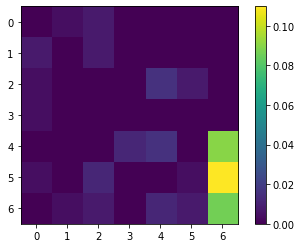

In [11]:
# featurs extraction :

import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
# import croped image and turn it into a matrix (1= a ful pixel, 0= empty pixel):
my_img = cv2.imread('./data.jpg')
inverted_img = (255.0 - my_img)
final = inverted_img / 255.0


# taking a 7x7 matrix to do extraction on :
b1 = final[0:7, 0:7,0]

plt.imshow(b1)
plt.colorbar()
#plt.gca().invert_yaxis()
plt.show()

# takes a 7x7 block and gives a and b 
def reg_77(block):
    xs= []
    ys= []
    # extraction of xs and ys :
    for i in range(0,7):
        for j in range(0,7):
            if(block[i][j]>=0.8):
                xs.append(i)
                ys.append(j)
    ys.reverse()
    # regression calculation : using this function gives almost same values as manual calculation
    if (len(xs)<2):
        return (None,None)
    else:
        return np.polyfit(xs, ys, 1)

    
# takes an image and returns a and b for all blocks 

def reg_image(img):
    values = []
    blocks = img_to_blocks(img)
    for block in blocks:
        a,b=reg_77(block)
        values.append([a,b])
    return values
    
# takes img and rturn list of blocks:
def img_to_blocks(img):
    blocks = []
    i=0
    j=0
    while(i<28):
        j=0
        while(j<28):
            blocks.append(img[i:i+7, j:j+7,0])
            j=j+7
        i=i+7
    return blocks

In [12]:
values = reg_image(final)
print(values)

[[None, None], [1.344827586206896, -1.6551724137931025], [-0.23584905660377403, 4.1415094339622645], [None, None], [None, None], [None, None], [0.15384615384615366, 3.0], [None, None], [None, None], [None, None], [0.22857142857142848, 2.0952380952380945], [None, None], [None, None], [None, None], [0.18614718614718617, 0.04329004329004348], [None, None]]


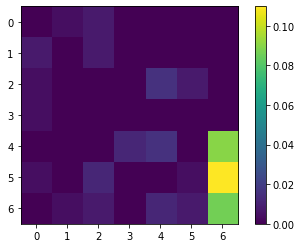

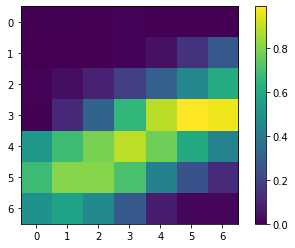

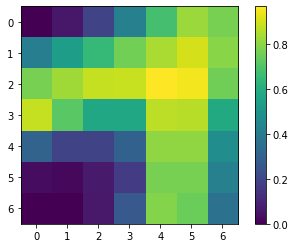

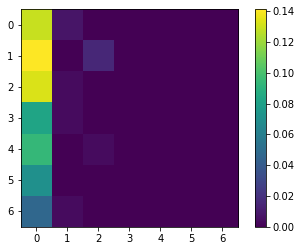

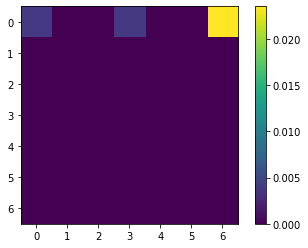

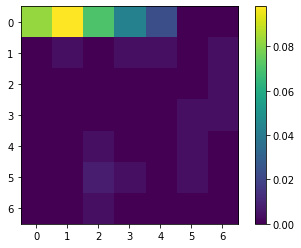

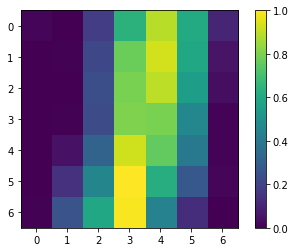

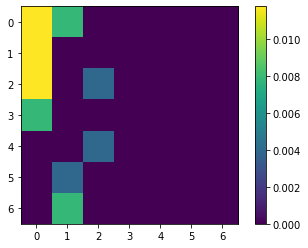

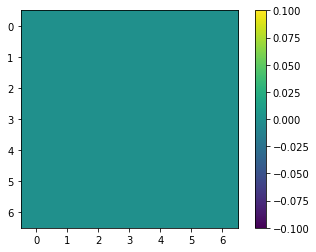

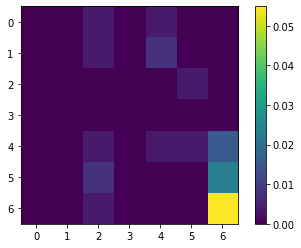

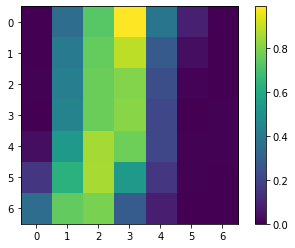

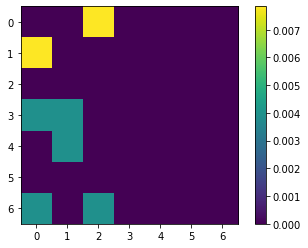

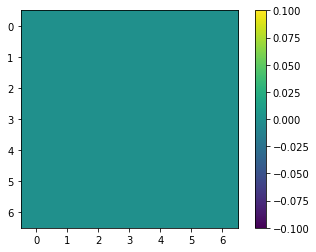

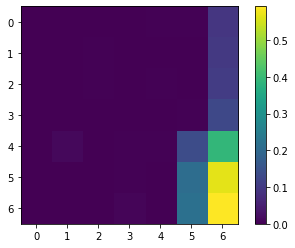

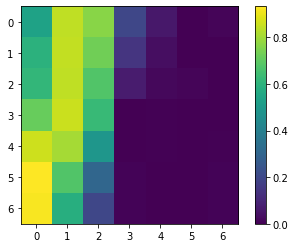

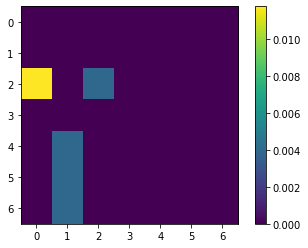

In [13]:
blocks = img_to_blocks(final)
for block in blocks:
    plt.imshow(block)
    plt.colorbar()
    plt.show()
